In [1]:
import h5py
import os

import fenics as fe
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

from tqdm import tqdm

import sys
sys.path.insert(0, "../scripts/")

from ns_2d import NSTwo

fe.set_log_level(40)

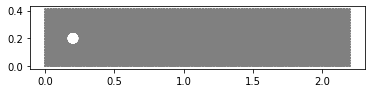

100%|███████████████████████████████████████████████████████████████████████| 320/320 [00:58<00:00,  5.46it/s]


In [2]:
mesh = "../mesh/featflow-2d-3-benchmark.xdmf"
ns = NSTwo(mesh, dict(dt=1/1600, theta=0.5))
fe.plot(ns.mesh)
plt.show()

F, J = ns.setup_form(ns.du, ns.du_prev)
bcs, F = ns.setup_bcs(F)
solver = ns.setup_solver(F, ns.du, bcs, J)

t = 0.
t_final = 0.2
nt = int((t_final - t) / ns.dt)
for i in tqdm(range(nt)):
    t += ns.dt
    
    ns.u_in.t = t
    solver.solve()
    ns.assign_prev()

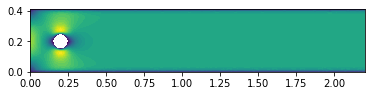

In [3]:
u, p = fe.split(ns.du)
u, v = fe.split(u)

fe.plot(u)
plt.show()

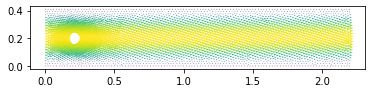

In [4]:
fe.plot(ns.u_in, mesh=ns.mesh)
plt.show()

In [7]:
p((0.15, 0.2)) - p((0.25, 0.2))

0.04398594427363299